In [1]:
%matplotlib inline


In [8]:
from data import Data
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
d = Data("DataExamples/BioSANS_exp318_scan0008_0001.xml")
d.setup()

data = d.data

#plt.figure()
#data.plot()

# Axes are inverted!
data = data.T
data = data.rename({'x': 'x_old', 'y': 'y_old'})
data = data.rename({'x_old': 'y', 'y_old': 'x'})


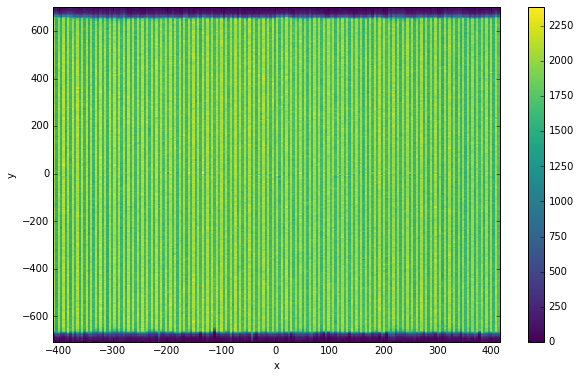

In [10]:
plt.figure("Raw")
data.plot()


/usr/lib/python3/dist-packages/numpy/core/numeric.py:301: FutureWarning:

in the future, full(192, 4) will return an array of dtype('int64')

/usr/lib/python3/dist-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



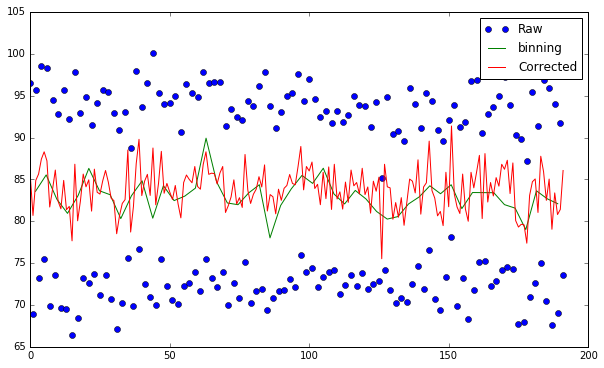

In [11]:
# Row selection
row = data.values[100]
plt.figure("Row average by pixel size")
pixel_v = np.full((192), 4)
pixel_h = np.full((192), 5.5)
pixel_size = pixel_v * pixel_h
plt.plot(row/pixel_size, 'bo', label="Raw")

bin_means, bin_edges, binnumber = stats.binned_statistic(range(192), row/pixel_size, statistic='mean',bins=50)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2
plt.plot(bin_centers,bin_means,'g-', label="binning")

pixel_h = np.tile([6.2,4.7], 192/2)
pixel_size = pixel_v * pixel_h
plt.plot(row/pixel_size, 'r-', label="Corrected")

plt.legend()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:301: FutureWarning:

in the future, full(192, 4) will return an array of dtype('int64')

/usr/lib/python3/dist-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



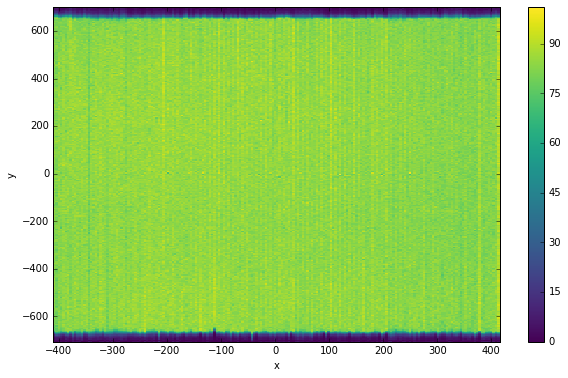

In [12]:
##
pixel_v = np.full((192), 4)
pixel_h = np.tile([6.2,4.7], 192/2)
pixel_v = np.tile(pixel_v,(256,1))
pixel_h = np.tile(pixel_h,(256,1))
pixel_size = pixel_v * pixel_h
data.values = data.values / pixel_size

plt.figure("Corrected")
data.plot()